# **Data Loading and Inspection**

In [2]:
import pandas as pd

# Load dataset
file_path = '/content/dsa_job.xlsx'
df = pd.read_excel(file_path)

In [3]:
print(df.head())

   work_year                             job_title  job_category  \
0       2022  Machine Learning Engineer  in office      Analysis   
1       2020                Statistician  (Remote)         ML/AI   
2       2022             Machine Learning Engineer         ML/AI   
3       2022               Data Analyst  in office         ML/AI   
4       2020                          Statistician  Data Science   

  salary_currency  salary  salary_in_usd employee_residence experience_level  \
0             EUR  186597         136086                 US               MI   
1             JPY  110630          67982                 JP               EX   
2             INR   61280         153309                 UK               MI   
3             JPY  154130         135242                 DE               SE   
4             EUR  172312          35156                 UK               MI   

  employment_type work_setting company_location company_size  
0              CT       Remote               DE

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   job_title           5000 non-null   object
 2   job_category        4500 non-null   object
 3   salary_currency     4500 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_in_usd       5000 non-null   int64 
 6   employee_residence  5000 non-null   object
 7   experience_level    4500 non-null   object
 8   employment_type     5000 non-null   object
 9   work_setting        5000 non-null   object
 10  company_location    5000 non-null   object
 11  company_size        4500 non-null   object
dtypes: int64(3), object(9)
memory usage: 468.9+ KB
None


In [5]:
print(df.describe())

        work_year         salary  salary_in_usd
count  5000.00000    5000.000000    5000.000000
mean   2020.97680  102046.307200  114076.995800
std       0.81951   70853.626492   49113.807687
min    2020.00000 -198754.000000   30016.000000
25%    2020.00000   64295.500000   71343.750000
50%    2021.00000  110636.000000  114167.000000
75%    2022.00000  153104.750000  156665.750000
max    2022.00000  199924.000000  199985.000000


# **Data Cleaning**

**Data Type Conversion**

In [6]:
# Convert work_year to integer
df['work_year'] = df['work_year'].astype(int)

# Convert categorical columns to the 'category' data type
categorical_columns = ['job_title', 'job_category', 'salary_currency', 'employee_residence',
                       'experience_level', 'employment_type', 'work_setting', 'company_location', 'company_size']
for col in categorical_columns:
    df[col] = df[col].astype('category')

**Handling Missing Values**

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 work_year               0
job_title               0
job_category          500
salary_currency       500
salary                  0
salary_in_usd           0
employee_residence      0
experience_level      500
employment_type         0
work_setting            0
company_location        0
company_size          500
dtype: int64


In [8]:
df = df.dropna()

**Standardizing Categorical Values**

In [9]:
# Standardize categorical columns to uppercase
text_columns = ['job_title', 'job_category', 'experience_level', 'employment_type', 'work_setting', 'company_size']
for col in text_columns:
    df.loc[:, col] = df[col].str.upper()

# experience level has consistent values
experience_levels = ['MI', 'SE', 'CT']
df = df[df['experience_level'].isin(experience_levels)].copy()

# Standardize salary_currency
df.loc[:, 'salary_currency'] = df['salary_currency'].str.upper()


<ipython-input-9-50b93d7063cd>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['MACHINE LEARNING ENGINEER  IN OFFICE' 'STATISTICIAN  (REMOTE)'
 'MACHINE LEARNING ENGINEER' ... 'MACHINE LEARNING ENGINEER'
 'STATISTICIAN' 'DATA SCIENTIST  (REMOTE)']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].str.upper()
<ipython-input-9-50b93d7063cd>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['ANALYSIS' 'ML/AI' 'ML/AI' ... 'ANALYSIS' 'DATA SCIENCE' 'ENGINEERING']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].str.upper()
<ipython-input-9-50b93d7063cd>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['REMOTE' 'REMOTE' 'HYBRID' ... 'HYBRID' 

**Check and Handle Outliers**

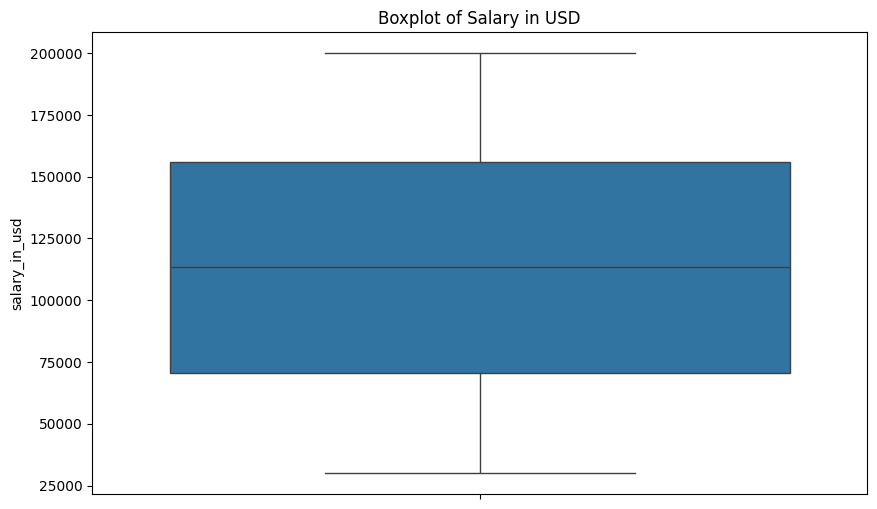

Number of outliers in 'salary_in_usd': 0
<class 'pandas.core.frame.DataFrame'>
Index: 2266 entries, 0 to 4998
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           2266 non-null   int64   
 1   job_title           2266 non-null   object  
 2   job_category        2266 non-null   object  
 3   salary_currency     2266 non-null   object  
 4   salary              2266 non-null   int64   
 5   salary_in_usd       2266 non-null   int64   
 6   employee_residence  2266 non-null   category
 7   experience_level    2266 non-null   category
 8   employment_type     2266 non-null   category
 9   work_setting        2266 non-null   object  
 10  company_location    2266 non-null   category
 11  company_size        2266 non-null   category
dtypes: category(5), int64(3), object(4)
memory usage: 153.9+ KB
Data summary after cleaning:
 None
Descriptive statistics after cleaning:
          work_yea

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot salary_in_usd distribution to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='salary_in_usd')
plt.title('Boxplot of Salary in USD')
plt.show()

# Detect outliers using the IQR method
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['salary_in_usd'] < lower_bound) | (df['salary_in_usd'] > upper_bound)]
print(f"Number of outliers in 'salary_in_usd': {outliers.shape[0]}")

# Remove outliers
df = df[(df['salary_in_usd'] >= lower_bound) & (df['salary_in_usd'] <= upper_bound)]

# Verify the cleaned data
print("Data summary after cleaning:\n", df.info())
print("Descriptive statistics after cleaning:\n", df.describe())

# **Exploratory Data Analysis (EDA)**

In [11]:
# Summary statistics for numerical columns
print(df[['salary', 'salary_in_usd']].describe())

# Unique values in categorical columns
for col in ['job_category', 'experience_level', 'work_setting', 'company_size']:
    print(f"Unique values in {col}: {df[col].unique()}")


              salary  salary_in_usd
count    2266.000000    2266.000000
mean   113282.618270  113180.962048
std     49169.482276   49313.912212
min     30059.000000   30016.000000
25%     70439.000000   70702.250000
50%    113643.500000  113258.500000
75%    155311.500000  156031.500000
max    199823.000000  199964.000000
Unique values in job_category: ['ANALYSIS' 'ML/AI' 'DATA SCIENCE' 'ENGINEERING']
Unique values in experience_level: ['MI', 'SE']
Categories (4, object): ['EN', 'EX', 'MI', 'SE']
Unique values in work_setting: ['REMOTE' 'HYBRID' 'IN-PERSON']
Unique values in company_size: ['L', 'S', 'M']
Categories (3, object): ['L', 'M', 'S']


**Visualizations**

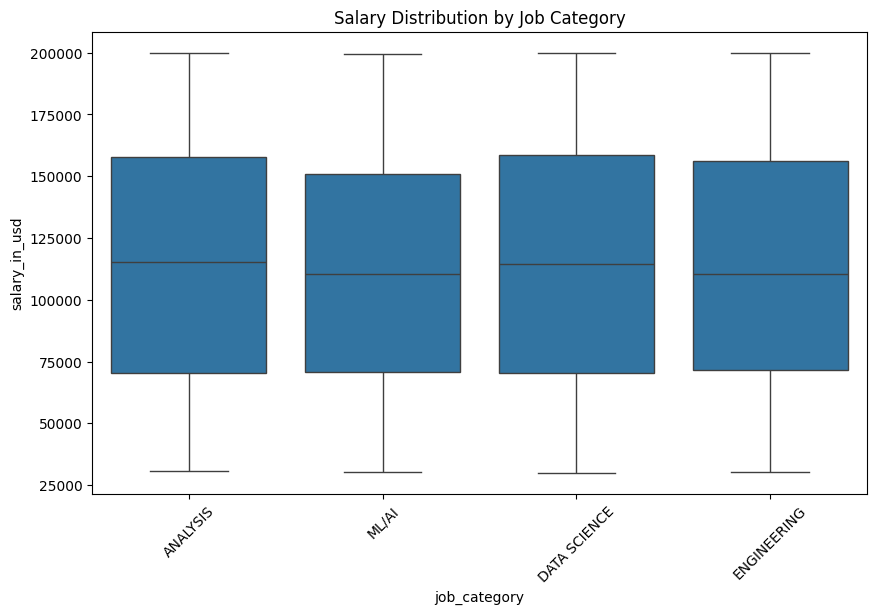

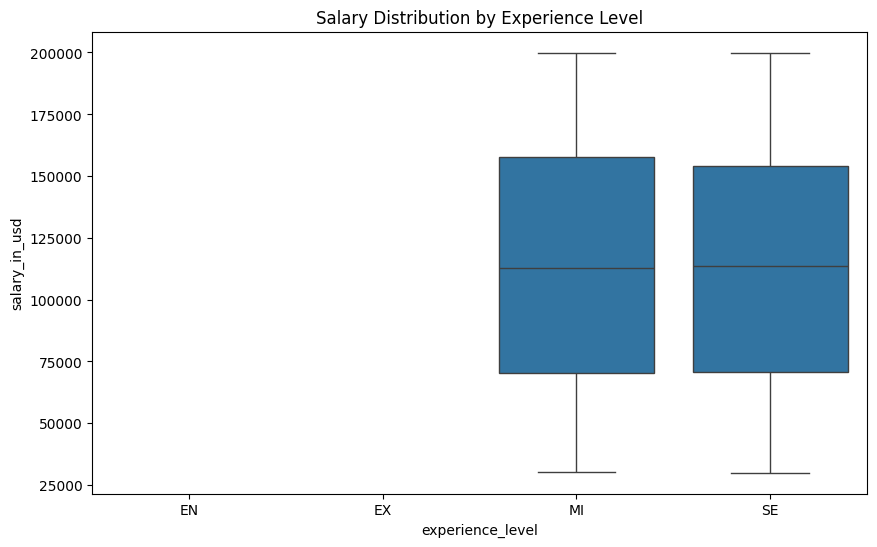

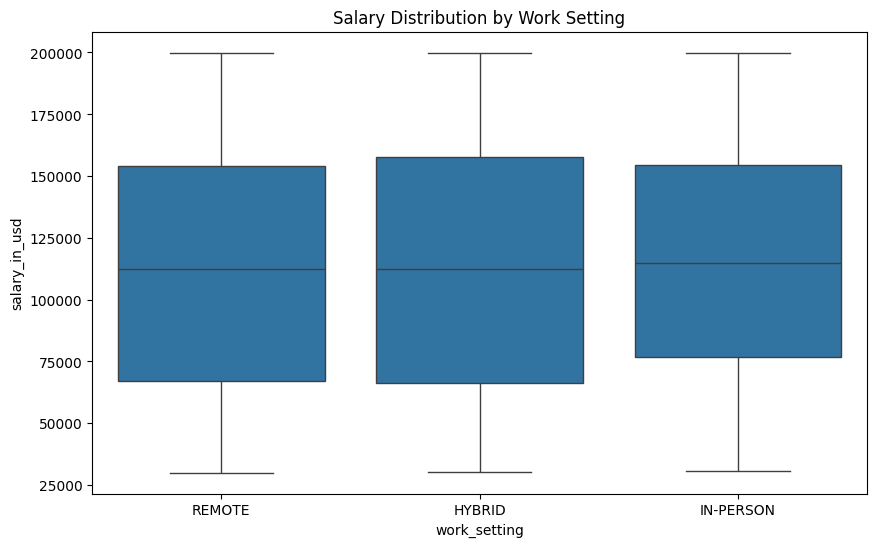

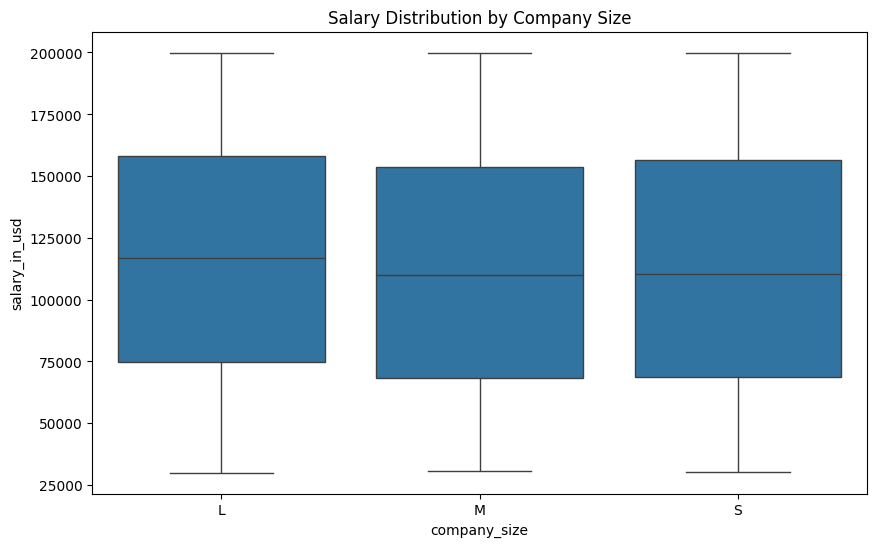

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Salary distribution by job category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='job_category', y='salary_in_usd')
plt.title('Salary Distribution by Job Category')
plt.xticks(rotation=45)
plt.show()

# Salary distribution by experience level
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd')
plt.title('Salary Distribution by Experience Level')
plt.show()

# Salary distribution by work setting
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='work_setting', y='salary_in_usd')
plt.title('Salary Distribution by Work Setting')
plt.show()

# Salary distribution by company size
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='company_size', y='salary_in_usd')
plt.title('Salary Distribution by Company Size')
plt.show()


**Correlation Analysis**

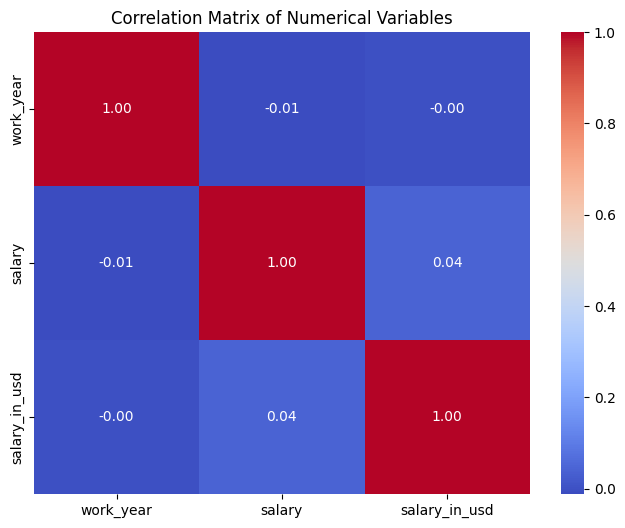

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Check if there are any numerical columns to avoid an empty plot
if not numeric_df.empty:
    # Correlation matrix for numerical variables
    plt.figure(figsize=(8, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Numerical Variables')
    plt.show()
else:
    print("No numerical columns available for correlation analysis.")


**Distribution Analysis**

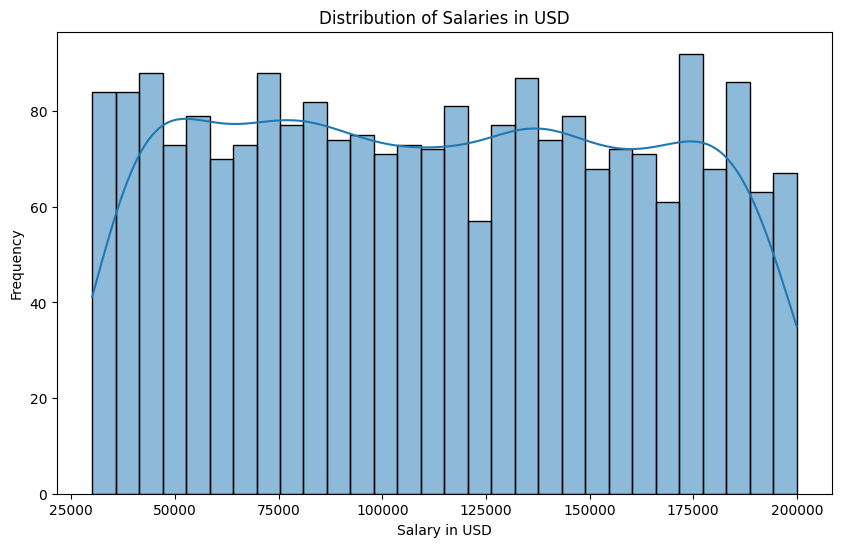

In [14]:
# Histogram and KDE of salaries
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title('Distribution of Salaries in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()


**Analysis by Year**

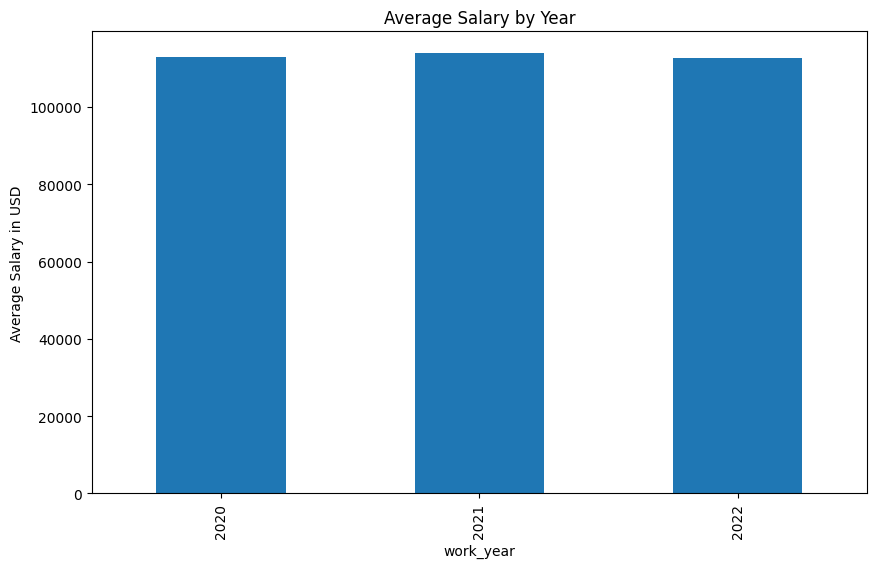

In [15]:
# Average salary by work year
avg_salary_by_year = df.groupby('work_year')['salary_in_usd'].mean()
avg_salary_by_year.plot(kind='bar', figsize=(10, 6), title='Average Salary by Year', ylabel='Average Salary in USD')
plt.show()


**Experience Level and Salary Analysis**

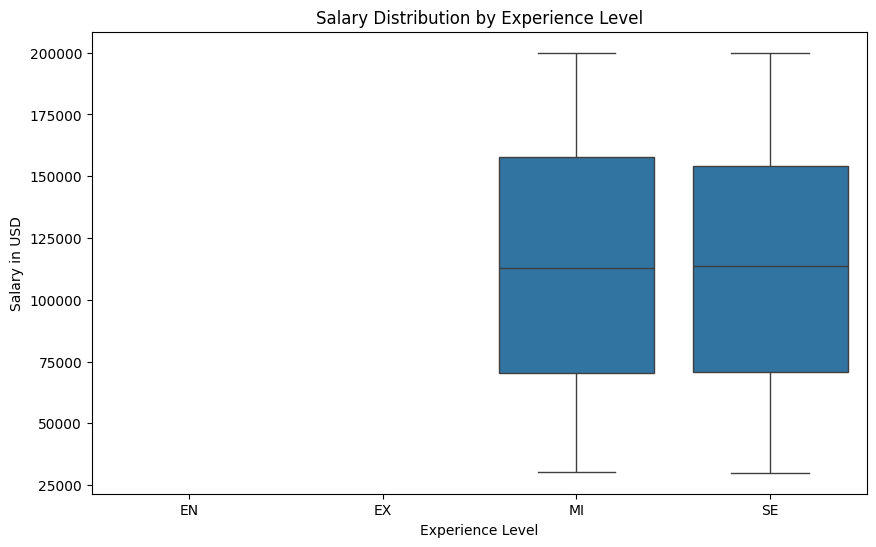

In [16]:
# Boxplot of salary by experience level
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd')
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()


**Location-Based Analysis**

<ipython-input-17-8b4fab6489bd>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_salary_by_residence = df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False).head(10)


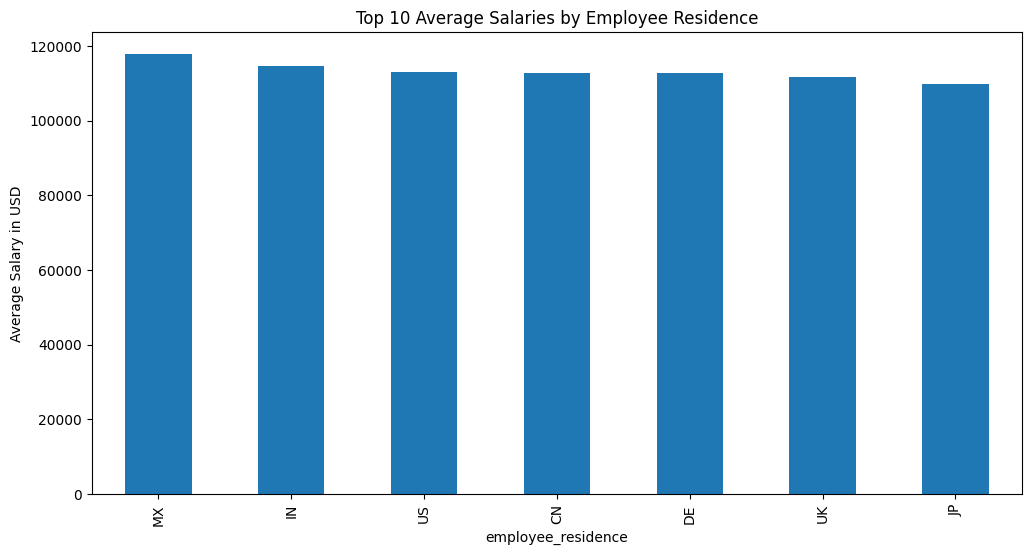

In [17]:
# Average salary by employee residence
avg_salary_by_residence = df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
avg_salary_by_residence.plot(kind='bar', figsize=(12, 6), title='Top 10 Average Salaries by Employee Residence')
plt.ylabel('Average Salary in USD')
plt.show()


**Job Category Analysis**

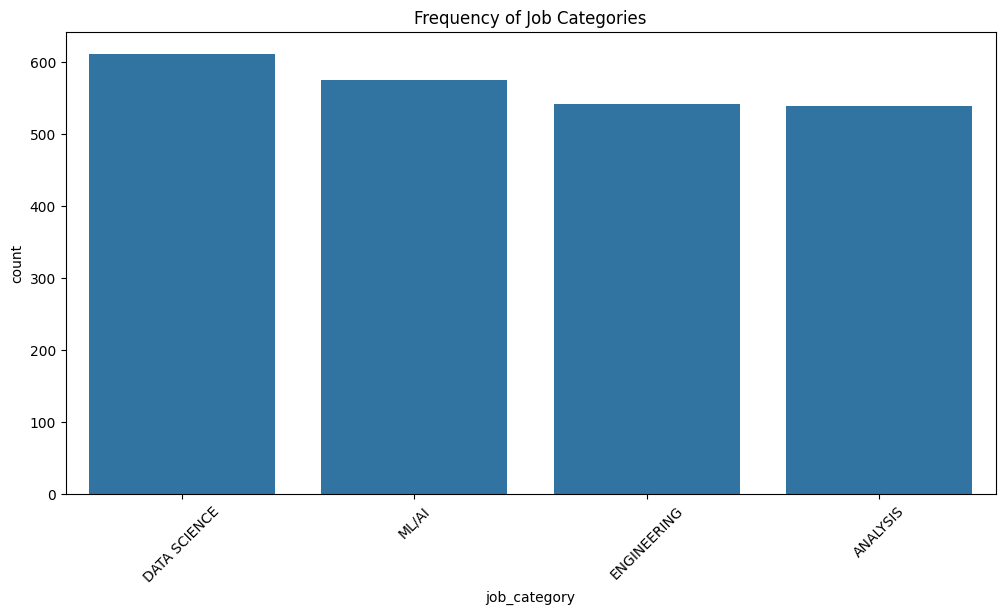

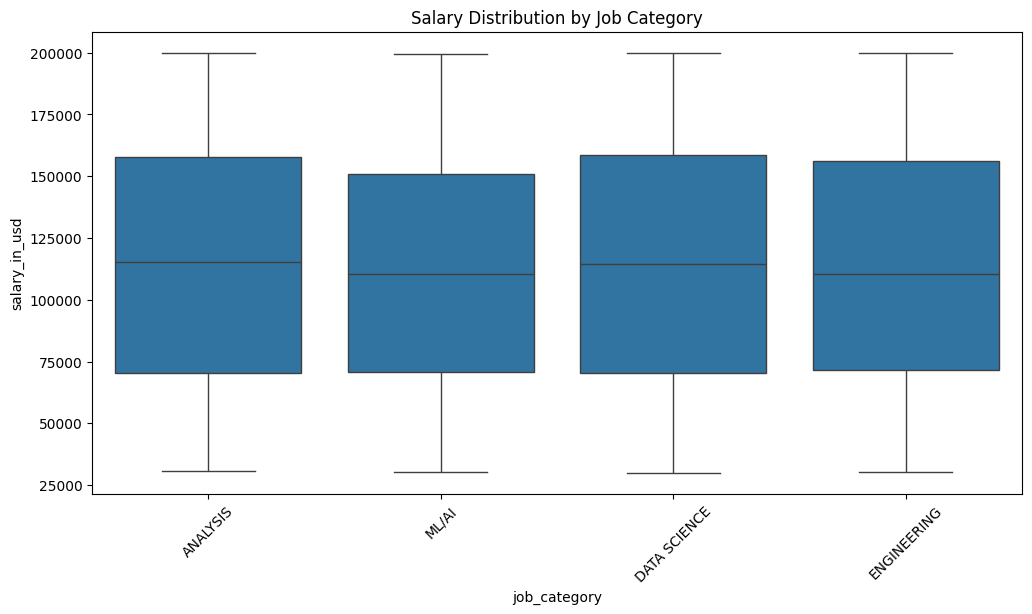

In [18]:
# Countplot for job categories
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='job_category', order=df['job_category'].value_counts().index)
plt.title('Frequency of Job Categories')
plt.xticks(rotation=45)
plt.show()

# Boxplot of salary by job category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='job_category', y='salary_in_usd')
plt.title('Salary Distribution by Job Category')
plt.xticks(rotation=45)
plt.show()


**Employment Type and Work Setting Analysis**

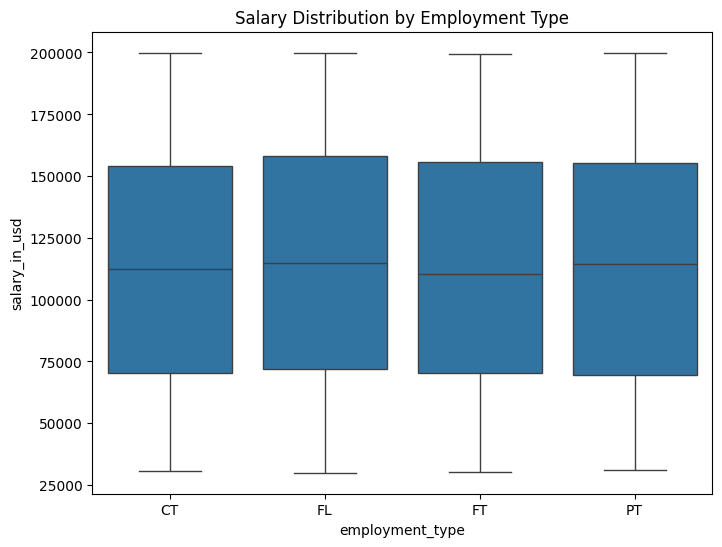

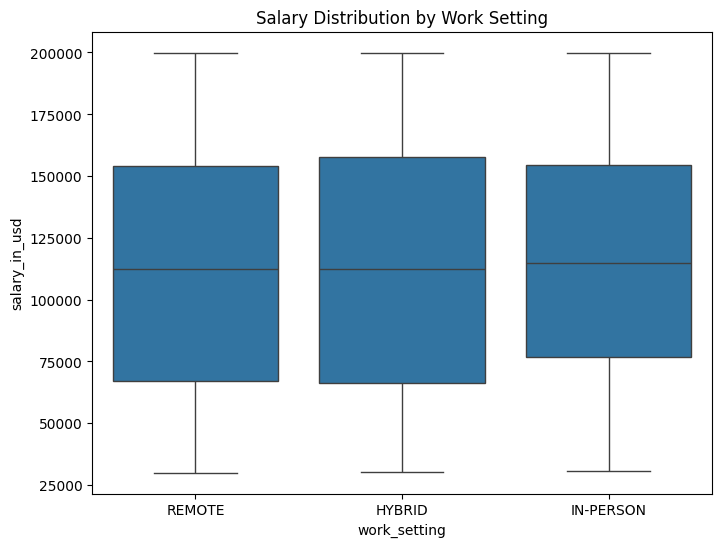

In [19]:
# Salary by employment type
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='employment_type', y='salary_in_usd')
plt.title('Salary Distribution by Employment Type')
plt.show()

# Salary by work setting
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='work_setting', y='salary_in_usd')
plt.title('Salary Distribution by Work Setting')
plt.show()


**Company Size Analysis**

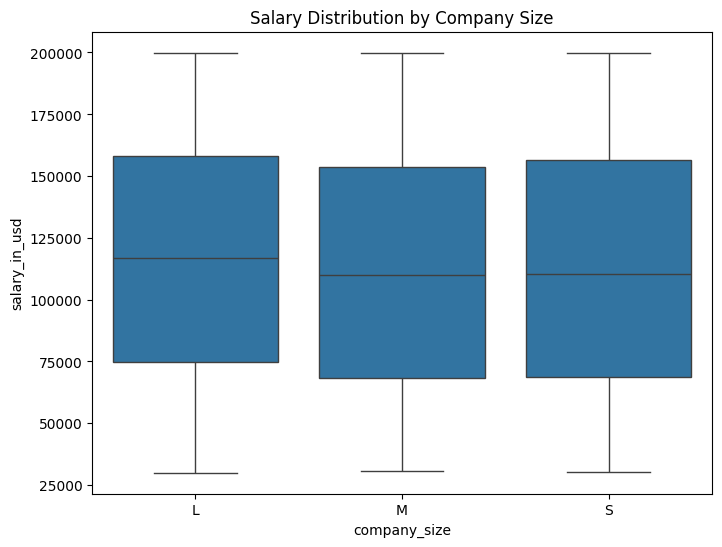

In [20]:
# Boxplot of salary by company size
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='company_size', y='salary_in_usd')
plt.title('Salary Distribution by Company Size')
plt.show()


**Top Job Titles by Salary**

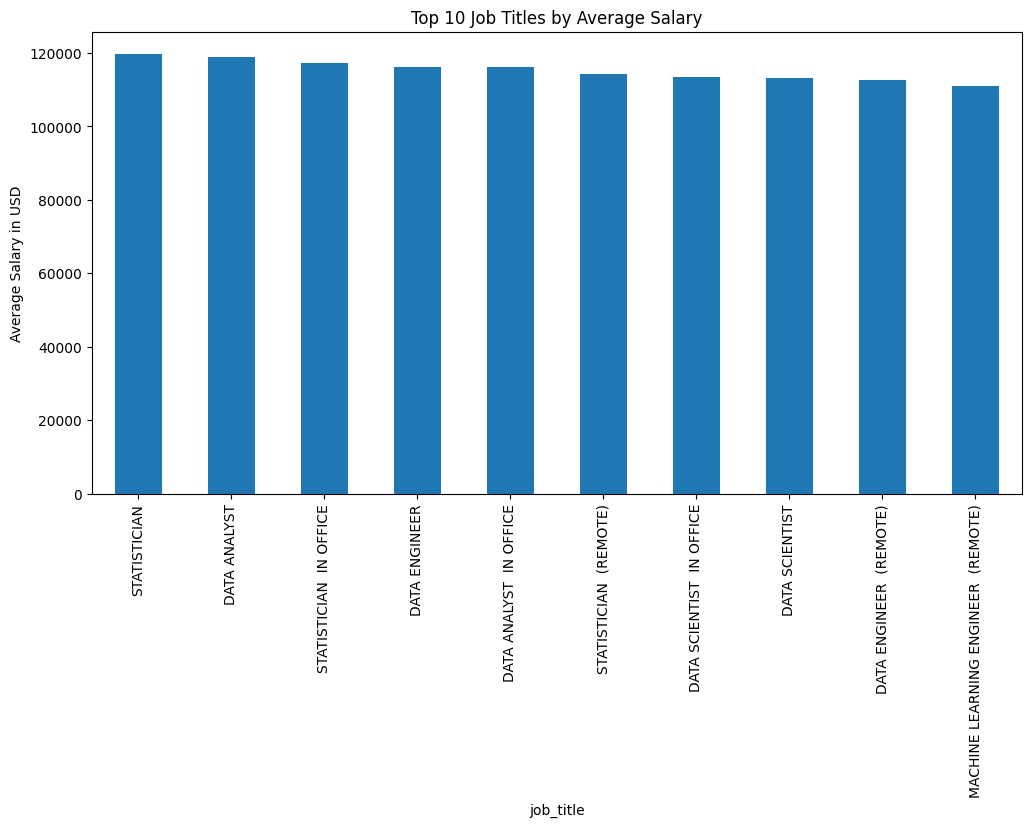

In [21]:
# Top 10 job titles by average salary
top_jobs_by_salary = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
top_jobs_by_salary.plot(kind='bar', figsize=(12, 6), title='Top 10 Job Titles by Average Salary')
plt.ylabel('Average Salary in USD')
plt.show()


**Salary Prediction and Job Analysis Using Machine Learning**


Data Understanding, Cleaning and Exploratory Data Analysis (EDA) Report

1.Data Understanding

1.1 Dataset OverviewThe dataset contains records of job roles, including salary information, experience levels, job categories, company details, and geographic data. Each row represents an individual job record, and each column provides specific information about that job.

1.2 Data Dictionary

The primary features in the dataset include:

·work_year: The year the data record was created.

·job_title: The specific title of the job position.

·job_category: The category or field to which the job belongs (e.g., Data Science, ML/AI).

·salary_currency: The currency in which the salary was originally provided.

·salary: The salary amount in the local currency.

·salary_in_usd: The salary converted to USD for consistency in analysis.

·employee_residence: The geographic location of the employee's residence.

·experience_level: The experience level of the employee, such as MI (Mid-level), SE (Senior), and EX (Executive).

·employment_type: The type of employment, such as full-time (FT), part-time (PT), or contract (CT).

·work_setting: Specifies whether the job is remote, in-office, or hybrid.

·company_location: The geographic location of the company.

·company_size: The size of the company, categorized as Small (S), Medium (M), or Large (L).

1.3 Initial Observations

·The dataset contains both numerical and categorical data.

·Salaries are provided in multiple currencies, but an additional column, salary_in_usd, ensures consistency for comparative analysis.

·Categorical features, such as job title, experience level, and employment type, will require standardization to ensure consistency.

·Missing values and outliers may be present and will need to be handled during the data cleaning phase.

2.Data Cleaning

2.1.Handling Missing Values

·Insights: Initial inspection revealed some missing values in the dataset. These were addressed by removing rows with missing values to ensure data integrity, though imputation could be considered if a substantial amount of missing data is encountered in future analysis.

·Challenges: Some columns had minimal missing data, so removing rows did not significantly impact the dataset size. However, if missing values had been more prevalent, imputation strategies (e.g., mean, median, or mode) would be necessary.


2.2.Data Type Standardization

·Insights: Data types for columns were standardized. Categorical features were converted to the category data type, which improves memory efficiency and ensures consistency in processing.

·Challenges: Ensuring that all text-based columns, such as experience_level, had consistent values (like "MI" for mid-level) required converting all text to uppercase. Variability in text format could have caused inconsistencies during EDA.

2.3.Outlier Detection and Handling

·Insights: Outliers were identified in the salary_in_usd column using the Interquartile Range (IQR) method. Outliers were removed to prevent them from skewing the results, particularly in salary analysis.

·Challenges: Removing outliers resulted in a smaller dataset, which could reduce the diversity of the data for machine learning models. Outlier treatment is critical for accurate salary prediction but must be carefully managed to avoid removing valid, high-salary data points.

3.Exploratory Data Analysis (EDA) Findings

3.1.Correlation Analysis

·Findings: The correlation matrix revealed very low correlations between salary_in_usd and other numerical variables (work_year and salary). This suggests that other non-numeric factors like job_title, experience_level, and job_category may be more influential in determining salary.

·Implications: Due to low correlations among numerical variables, our analysis will focus more on categorical features, which seem to play a larger role in determining salary levels.

3.2Distribution Analysis

·Insights: The salary distribution, as seen in the histogram, is fairly uniform, though with some concentration at lower salary ranges and a slight drop-off at higher levels. The distribution suggests that there’s a broad range of salaries across different roles and levels.

·Challenges: The uniformity might indicate a diverse dataset but also hints that certain high-salary roles may have specific attributes (like experience level and job type) influencing compensation.

3.3Analysis by Year

·Findings: The average salary across different years (2020, 2021, 2022) remains relatively stable, with a slight increase observed in 2021. However, the year doesn't significantly affect salary compared to other factors.

·Implications: This stability suggests that salary growth over the years may be moderate, possibly due to a mix of positions and industries with different growth rates.

3.4Experience Level and Salary Analysis

·Insights: There’s a clear positive trend where higher experience levels, such as SE (Senior) and EX (Executive), correspond with higher median salaries. Entry-level (MI) roles generally fall at the lower end of the salary spectrum.

·Challenges: Ensuring consistent experience level categorization was essential, as minor inconsistencies could have impacted the analysis. Additionally, the presence of high salaries at lower experience levels could indicate roles that require specialized skills rather than general experience.

3.5Location-Based Analysis

·Top Salaries by Location: The top 10 average salaries are concentrated in countries such as Mexico (MX), China (CN), and Germany (DE). This could be influenced by specific industries in these regions or differing cost-of-living adjustments.

·Implications: The variation in salaries by location underscores the need for context in salary analysis. Companies may offer competitive compensation based on geographic demand for certain skills or to offset the cost of living in certain regions.

3.6Job Category Analysis

·Distribution: The most common job categories are Data Science, ML/AI, Analysis, and Engineering. Data Science roles appear to be slightly more frequent, followed closely by ML/AI.

·Salary Insights: Certain categories like ML/AI tend to be on the higher end of the salary range. However, median salaries in Analysis are generally lower, indicating differences in compensation across fields.

·Implications: This analysis suggests that high-demand fields like ML/AI and Data Science may command higher salaries due to specialized skills.

3.7Employment Type and Work Setting Analysis

·Employment Type: Full-time (FT) roles offer higher median salaries than contract (CT) and part-time (PT) positions. Freelance (FL) roles have a broad salary range, possibly due to variable contract lengths and project types.

·Work Setting: Remote positions and in-office roles show relatively similar salary ranges. However, specific job titles or companies may have different policies influencing compensation based on work setting.

·Challenges: The similarity in median salaries across work settings suggests companies might not yet heavily differentiate pay based on work setting. This might shift if remote work becomes more standardized and expectations around compensation evolve.

3.8Company Size Analysis

·Insights: Large (L), medium (M), and small (S) companies have relatively similar salary distributions, with slight variations. Large companies show a wider range, likely due to more hierarchical roles.

·Challenges: The impact of company size on salary may vary based on industry and role. The similar medians across sizes suggest that while larger companies offer high-paying roles, small and medium companies also provide competitive compensation for specialized roles.

3.9op Job Titles by Salary

·Highest-Paying Roles: The top job titles by average salary include Machine Learning Engineer, Statistician, and Data Scientist. Remote roles in these fields tend to offer high salaries, potentially reflecting the demand for flexible, skilled workers in these positions.

·Implications: Specialized roles like Machine Learning Engineer and Statistician offer high compensation, which aligns with the demand for advanced technical skills in these fields.


Summary of Insights and Challenges
Insights:

* Experience level, job category, and specific job titles have a substantial impact on salary, whereas numerical variables like work_year show minimal correlation.
* Geographic location plays a significant role in salary differences, reflecting local market demands and cost of living adjustments.
* There is a uniform distribution of salaries across company sizes and employment types, but specialized roles in high-demand fields command the highest pay.

Challenges:

* Variability in experience levels and job titles required careful standardization to maintain analysis accuracy.
* Uniform salary distribution across some categorical variables, such as company size, could limit the insights derived from these factors.
* Low correlation among numerical features indicates that non-numerical factors are crucial in salary prediction, requiring advanced modeling techniques that capture categorical and contextual influences.